In [57]:
import numpy as np
from numpy import ma
import pandas as pd
from scipy.stats import norm
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt



np.set_printoptions(precision=5, suppress=True)

# Set random seed to student number
np.random.seed(46387334) # TODO: UNCOMMENT

In [58]:
# Helper functions
def sig_fig(X, sigfigs):
    exp = np.floor(ma.log10(abs(X)).filled(0))
    return np.round(X*10**-exp, sigfigs-1) * 10**exp

def get_diff(a1, a2):
    print(f"{a1.shape=}")
    print(f"{a2.shape=}")

    rows, cols = a1.shape
    for i in range(rows):
        for j in range(cols):
            print(f"[{i},{j}]: {round(a1[i, j], 3) :>5} vs {round(a2[i, j], 3) :>7}  |  Error: {(a1[i, j] - a2[i, j]) * (100 / a1[i, j])  :.2f}%")

## 1.c)

In [59]:
# Variables that make up multivariate normal distribution
vars_h = [
    'logcp',
    'ejection_fraction',
    'sqrtplat',
    'recipsc',
    'serum_sodium'
]
n_vars = len(vars_h)

# mu_h hat - Mean vector for multivariate normal distribution
mu_h = np.array([
    [5.66 ],
    [38.1 ],
    [505  ],
    [0.891],
    [137  ]
])

# Sigma_h hat - Covariance matrix for multivariate normal distribution
sigma_h = np.array([
    [1.29,   -0.928, 1.01,   0.0235, 0.0953],
    [-0.928, 140,    77.8,   0.514,  9.19  ],
    [1.01,   77.8,   8757,   1.82,   23.0  ],
    [0.0235, 0.514,  1.82,   0.100,  0.354 ],
    [0.0953, 9.19,   23.0,   0.354,  19.5  ]
])

### Part 1. Produce a plot of the (joint) marginal distribution of ejection fraction and sqrtplat

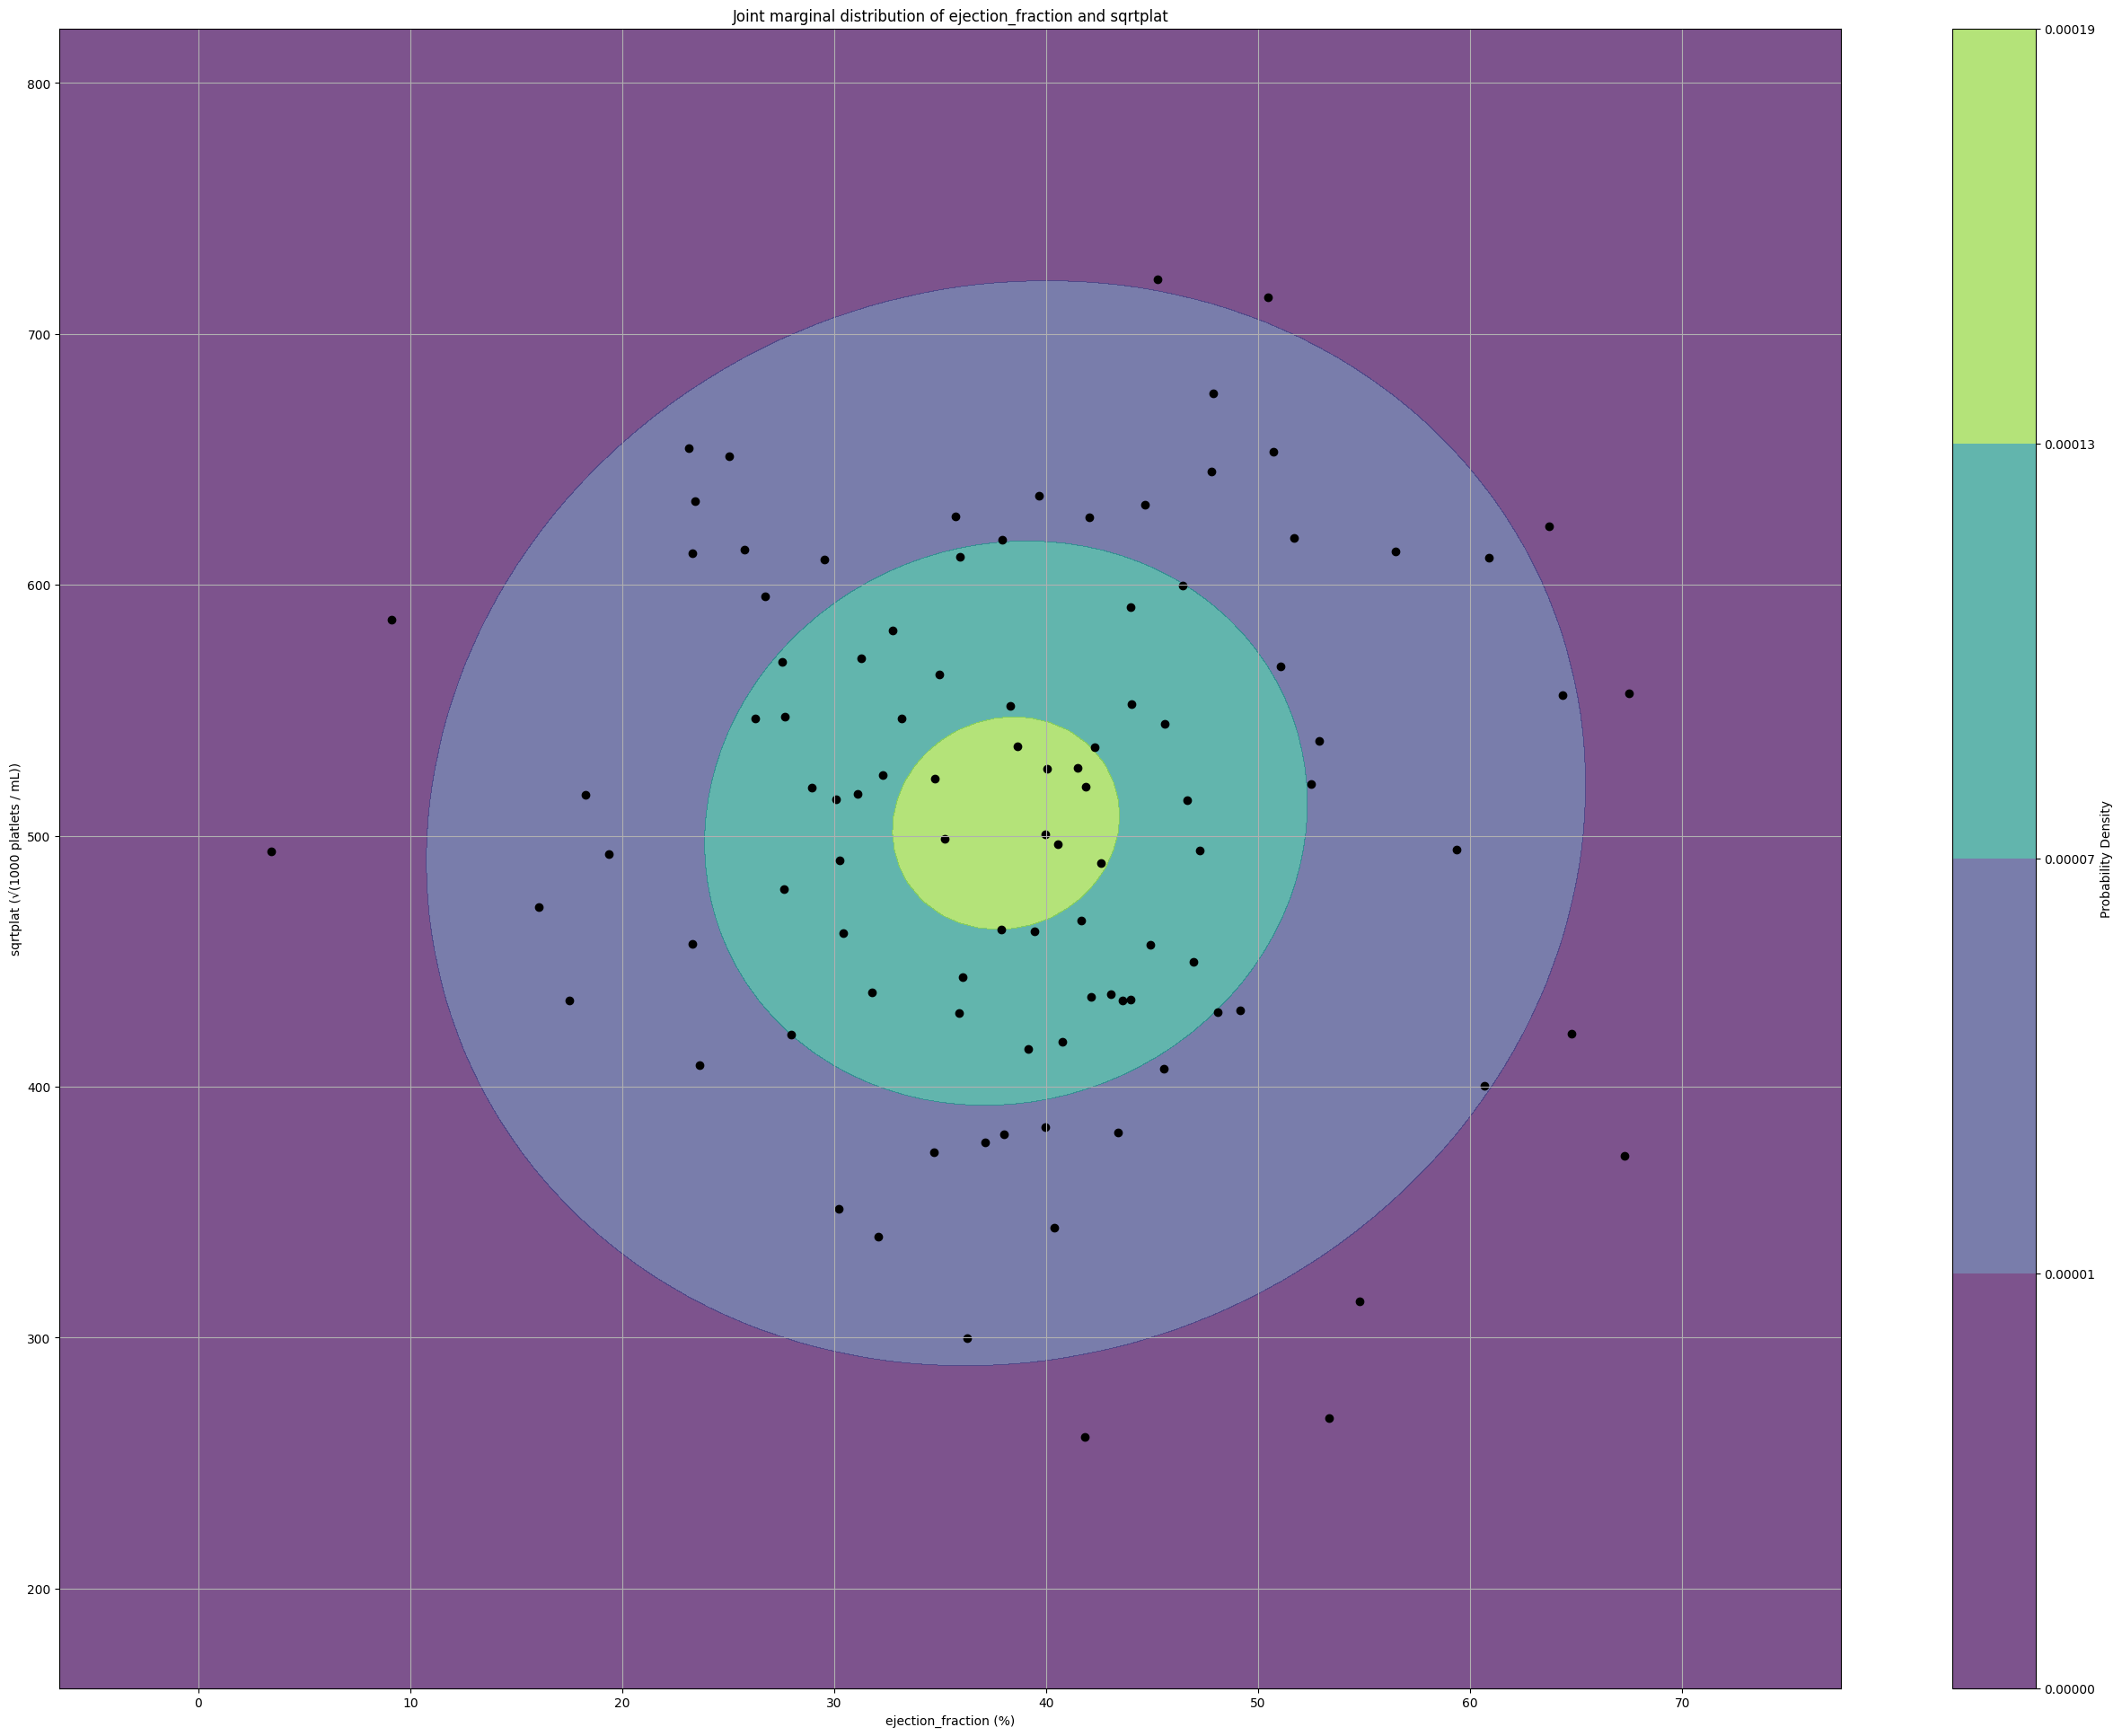

In [68]:
# Load the CSV file
df = pd.read_csv('question_1_a_obs.csv')

# Extract variables
var_indices       = [1, 2]
ejection_fraction = df['ejection_fraction'].values
sqrtplat          = df['sqrtplat'].values

# Mean and covariance matrix for the multivariate normal distribution
mu    = mu_h[var_indices]
sigma = sigma_h[np.ix_(var_indices, var_indices)]

# Create a grid for each of the variables with padding
ejection_fraction_grid, sqrtplat_grid = np.meshgrid(np.linspace(ejection_fraction.min() - 10, ejection_fraction.max() + 10, 100), np.linspace(sqrtplat.min() - 100, sqrtplat.max() + 100, 100))
grid_points = np.vstack([ejection_fraction_grid.ravel(), sqrtplat_grid.ravel()]).T

# Compute the multivariate normal distribution
rv = multivariate_normal(mu.reshape(2,), sigma)
z = rv.pdf(grid_points)
z = z.reshape(ejection_fraction_grid.shape)

# Plotting the contour
plt.figure(figsize=(8, 6))
levels = [0, 0.00001, 0.00007, 0.00013, 0.00019]
contour = plt.contourf(ejection_fraction_grid, sqrtplat_grid, z, levels=levels, cmap='viridis', alpha=0.7)

# Add a colorbar with a smooth gradient
cbar = plt.colorbar(contour)
cbar.set_label('Probability Density')

# Plot the data points
plt.grid()
plt.scatter(ejection_fraction, sqrtplat, color='black', edgecolor='k', marker='o', label='Data points')

# Add labels and titles
plt.title('Joint marginal distribution of ejection_fraction and sqrtplat')
plt.xlabel('ejection_fraction (%)')
plt.ylabel('sqrtplat (√(1000 platlets / mL))')
plt.show()

# Caption
# Joint marginal distribution of ejection_fraction and sqrtplat observations with contours based off generating Multivariate Normal Distribution

### Part 2. produce a plot of the conditional distribution of ejection fraction and sqrtplat given the other variables fixed to the values mentioned above. Include contour lines for the same density levels as with the marginal distribution plot

In [61]:
# Mean vector for conditonal ultivariate normal distribution
mu_cond = np.array([
    [36.287 ],
    [503.27 ]
])

# Covariance matrix for conditonal multivariate normal distribution
sigma_cond = np.array([
    [133.52, 62.226],
    [62.226, 8708.6,  ],
])

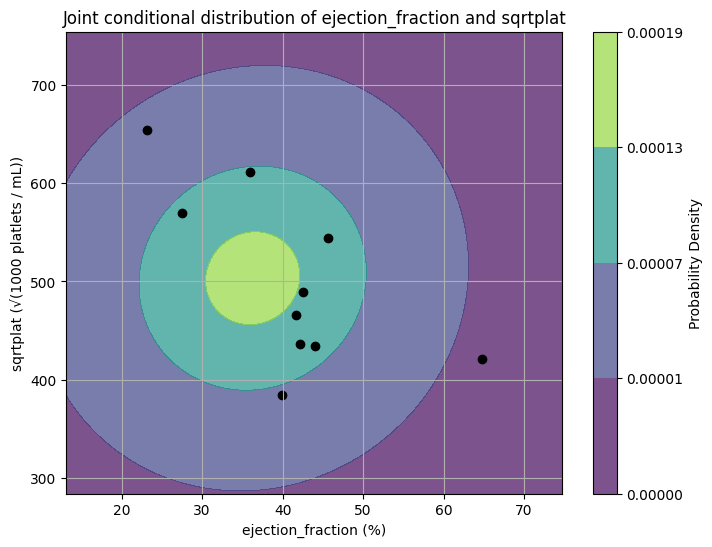

In [67]:
# Load the CSV file
df = pd.read_csv('question_1_a_obs.csv')

# Given values for patient
x_B = np.array([8, 0.4, 142])

# Extract variables
ejection_fraction = []
sqrtplat          = []

# Compute the L2 norm for each row
df['hyper_dist'] = np.sqrt((df[['logcp', 'recipsc', 'serum_sodium']] - x_B)**2).sum(axis=1)

# Get the 10 data points with the smallest L2 norm (hyper_dist)
smallest_dist_df  = df.nsmallest(10, 'hyper_dist')
ejection_fraction = smallest_dist_df['ejection_fraction'].values
sqrtplat          = smallest_dist_df['sqrtplat'].values

# Mean and covariance matrix for the multivariate normal distribution
mu    = mu_cond
sigma = sigma_cond

# Create a grid for each of the variables with padding
ejection_fraction_grid, sqrtplat_grid = np.meshgrid(np.linspace(ejection_fraction.min() - 10, ejection_fraction.max() + 10, 100), np.linspace(sqrtplat.min() - 100, sqrtplat.max() + 100, 100))
grid_points = np.vstack([ejection_fraction_grid.ravel(), sqrtplat_grid.ravel()]).T

# Compute the multivariate normal distribution
rv = multivariate_normal(mu.reshape(2,), sigma)
z = rv.pdf(grid_points)
z = z.reshape(ejection_fraction_grid.shape)

# Plotting the contour
plt.figure(figsize=(8, 6))
levels = [0, 0.00001, 0.00007, 0.00013, 0.00019]
contour = plt.contourf(ejection_fraction_grid, sqrtplat_grid, z, levels=levels, cmap='viridis', alpha=0.7)

# Add a colorbar with a smooth gradient
cbar = plt.colorbar(contour)
cbar.set_label('Probability Density')

# Plot the data points
plt.grid()
plt.scatter(ejection_fraction, sqrtplat, color='black', edgecolor='k', marker='o', label='Data points')

# Add labels and titles
plt.title('Joint conditional distribution of ejection_fraction and sqrtplat')
plt.xlabel('ejection_fraction (%)')
plt.ylabel('sqrtplat (√(1000 platlets / mL))')
plt.show()

# Caption
# Joint marginal distribution of ejection_fraction and sqrtplat observations\nWith contours based off generating Multivariate Normal Distribution